## Why To Check Stationarity Of the Data ??
- Stationary data ensures consistent statistical properties over time.
- It allows the application of various statistical techniques and models.
- Non-stationary data may contain trends or seasonality that can lead to incorrect conclusions.
- Confirming data stationarity is essential for accurate analysis and forecasting in time series data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('champagne.csv', parse_dates = ['Month'], index_col ='Month') 
                                    # its impt to convert column into index for TSA problems
data

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [3]:
data.isnull().sum()

Sales    0
dtype: int64

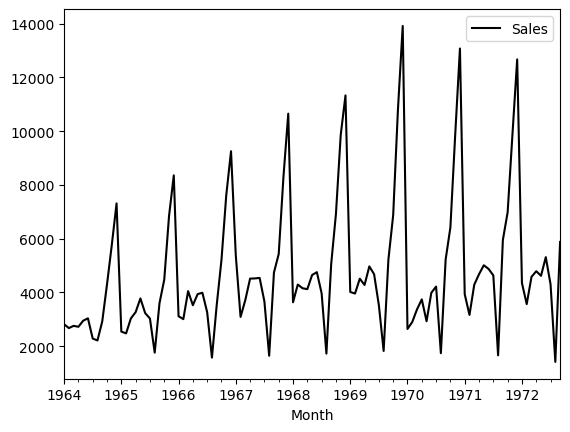

In [4]:
data.plot(c  = 'black')
plt.show()



1. **ADF Test (Augmented Dickey-Fuller Test):**
   - **Purpose:** The ADF test is primarily used to test whether a time series is stationary or non-stationary. It helps determine if a dataset has a unit root, which indicates non-stationarity.
   - **Hypotheses:** The test evaluates two hypotheses: the null hypothesis (H0) is that the data has a unit root (it is non-stationary), while the alternative hypothesis (H1) is that the data is stationary.
   - **Usage:** Data analysts and econometricians often use the ADF test to check if differencing is required to make a time series stationary. If the null hypothesis is rejected, it suggests that differencing is needed to achieve stationarity.





In [5]:
from statsmodels.tsa.stattools import adfuller


**Null Hypothesis (H0):** The null hypothesis in the ADF test is that the time series has a unit root, indicating that it is non-stationary. In other words, the data follows a stochastic (random) trend and does not exhibit stationarity.

**Alternative Hypothesis (H1):** The alternative hypothesis in the ADF test is that the time series does not have a unit root, suggesting that it is stationary. In simpler terms, it implies that the data has a deterministic (fixed) trend or is stationary in a manner that doesn't involve a unit root.




In [6]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    print("ADF Test statistic", result[0])
    print("p value", result[1])
    print("Lag used", result[2])
    print("Number of Observations", result[3])
    
    if result[1] < 0.05:
        print("Fail to Reject Null Hypothesis: It is Stationary")
    else:
        print("Reject Null Hypothesis: It is Non-Stationary")

sales_data = data['Sales']
adfuller_test(sales_data)

ADF Test statistic -1.8335930563276195
p value 0.3639157716602467
Lag used 11
Number of Observations 93
Reject Null Hypothesis: It is Non-Stationary


2. **KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin Test):**
   - **Purpose:** The KPSS test, on the other hand, is used to test for stationarity around a deterministic trend, as opposed to the ADF test, which tests for stationarity around a stochastic trend.
   - **Hypotheses:** The KPSS test also evaluates two hypotheses: the null hypothesis (H0) is that the data is stationary around a deterministic trend, while the alternative hypothesis (H1) is that the data has a unit root (it is non-stationary around a stochastic trend).
   - **Usage:** It is often used when there is a prior belief that the data may have a deterministic trend component. If the null hypothesis is rejected, it suggests the presence of a unit root.

In [7]:
from statsmodels.tsa.stattools import kpss


**Null Hypothesis (H0):** The null hypothesis in the KPSS test is that the data is stationary around a deterministic trend. In other words, it assumes that the data has a trend but is stationary in a manner that doesn't involve a unit root.

**Alternative Hypothesis (H1):** The alternative hypothesis in the KPSS test is that the data has a unit root, indicating non-stationarity. This suggests that the data follows a stochastic (random) trend.



In [8]:
def kpss_test(sales):
    results = kpss(sales)
    
    print("Kpss Test Statistics", results[0])
    print("P value", results[1])
    print("Lags used", results[2])
    print("Number of Observations", results[3])
    
    
    if results[1] < 0.05:
        print("Reject Null Hypothesis: It is Non-Stationary")
    else:
        print("Fail to Reject Null Hypothesis: It is Stationary")
        
sales_data = data['Sales']
kpss_test(sales_data)

Kpss Test Statistics 0.5126721182337015
P value 0.03881258598340056
Lags used 3
Number of Observations {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Reject Null Hypothesis: It is Non-Stationary


## Concept Of Differencing 
**Why Use Differencing for Non-Stationary Data in Time Series Analysis:**

- **Stationarity Requirement:** Many models require stationary data.
- **Trend Removal:** Differencing eliminates trends in the data.
- **Variance Stabilization:** It helps stabilize changing variances.
- **Better Modeling:** Stationary data enables more accurate modeling techniques.
- **Improved Forecasting:** Differencing leads to more reliable forecasts.

In [9]:
data['First_difference'] = data['Sales'] - data['Sales'].shift(1)
data['Seasonal_difference'] = data['Sales'] - data['Sales'].shift(12)

In [10]:
data

,Sales,First_difference,Seasonal_difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
...,...,...,...
1972-05-01,4618,-170.0,-392.0
1972-06-01,5312,694.0,438.0
1972-07-01,4298,-1014.0,-335.0


In [11]:
adfuller_test(data['First_difference'].dropna())

ADF Test statistic -7.189896448051006
p value 2.51962044738698e-10
Lag used 11
Number of Observations 92
Fail to Reject Null Hypothesis: It is Stationary


#### After first differencing the data seems to be stationary but when we visiualiza it is still showing some trends.
#### So, Will go ahead with seasonal Differencing in order to eliminate the seasonality in data 

In [12]:
adfuller_test(data['Seasonal_difference'].dropna())

ADF Test statistic -7.626619157213166
p value 2.0605796968136632e-11
Lag used 0
Number of Observations 92
Fail to Reject Null Hypothesis: It is Stationary


In [13]:
kpss_test(data['First_difference'].dropna())

Kpss Test Statistics 0.41180558420241825
P value 0.0720665585334404
Lags used 11
Number of Observations {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Fail to Reject Null Hypothesis: It is Stationary


In [14]:
kpss_test(data['Seasonal_difference'].dropna())

Kpss Test Statistics 0.2943966017028953
P value 0.1
Lags used 3
Number of Observations {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Fail to Reject Null Hypothesis: It is Stationary


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


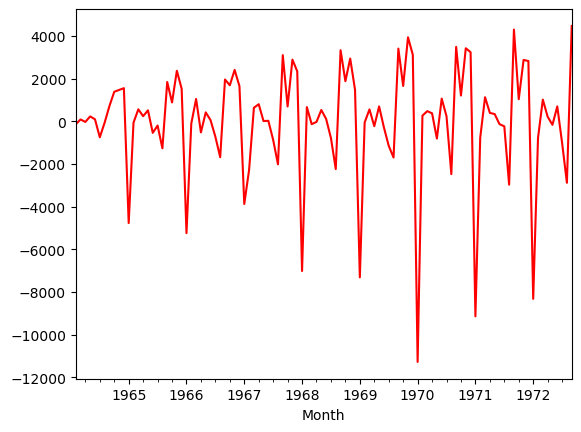

In [15]:
data['First_difference'].dropna().plot(c='red')
plt.show()

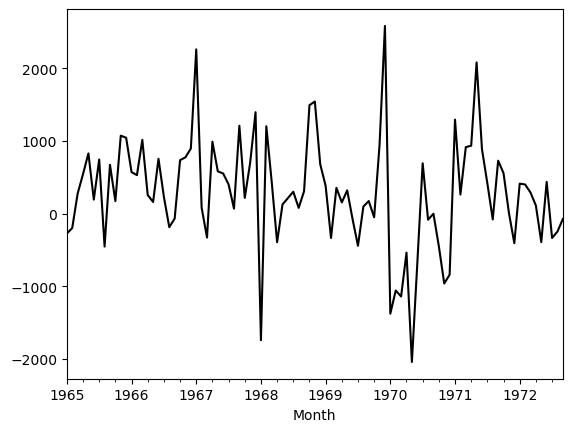

In [16]:
data['Seasonal_difference'].dropna().plot(c='black')
plt.show()

### Here we can see there is neither trend  nor Seasonality..!! this will be good to go ahead to apply ARIMA/SARIMAX or any other algorithms to forecast sales 

**Conclusion**

In the dynamic world of data, time series analysis stands as a vital compass, guiding us through trends, seasonality, and hidden insights. By unlocking the power of historical data, we illuminate the path to more informed decisions, precise forecasts, and a deeper understanding of the patterns that shape our world. In the hands of skilled analysts and robust models, time series analysis becomes a key tool for unraveling the mysteries of the past and foreseeing the trends of the future. So, let's continue to explore, model, and analyze time series data, knowing that within it lies a wealth of valuable knowledge waiting to be discovered.

#### Author -    Vinayak Shivanagutti